# 4.10 Visualizations for business questions

# Contents
# 1. Create sample to save power
# 2. Create and save bar charts for variables of interest
# 3. Create and save pie charts
# 4. Create and save multiples bar charts
# 5. Investigate visualisations for three or more variables
# 6. Look at different variable aggregations

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# def file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/Instacart  Basket Analysis' 

In [3]:
# get latest merged df
new_all_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'new_all_merged_plus.pkl'))

In [5]:
# expected dimensions 24414877 rows x 36 columns
new_all_merged.shape

(24414877, 36)

In [7]:
new_all_merged.describe()

,Age,n_dependants,income,product_id,aisle_id,department_id,prices,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,av_product_price,Frequent customer
count,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441117e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07
mean,4.945734e+01,1.502001e+00,9.989505e+04,2.559043e+04,7.117742e+01,9.929307e+00,7.790672e+00,2.194990e+01,2.747950e+00,1.336244e+01,1.008523e+01,8.376212e+00,6.931801e-01,3.848836e+01,7.788034e+00,8.952002e+00
std,1.848532e+01,1.119171e+00,4.333357e+04,1.407628e+04,3.823019e+01,6.282674e+00,4.237120e+00,1.771938e+01,2.084170e+00,4.247337e+00,8.140287e+00,7.161771e+00,4.611740e-01,2.502275e+01,7.070810e-01,5.791608e+00
min,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
25%,3.300000e+01,0.000000e+00,6.752400e+04,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,9.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.800000e+01,7.390921e+00,5.000000e+00
50%,4.900000e+01,2.000000e+00,9.683600e+04,2.523200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.600000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,3.300000e+01,7.811076e+00,7.000000e+00
75%,6.500000e+01,3.000000e+00,1.281600e+05,3.793500e+04,1.070000e+02,1.600000e+01,1.120000e+01,2.900000e+01,5.000000e+00,1.600000e+01,1.300000e+01,1.100000e+01,1.000000e+00,5.200000e+01,8.213978e+00,1.100000e+01
max,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.370000e+02,1.000000e+00,9.900000e+01,2.011429e+01,3.000000e+01


In [21]:
crosstab = pd.crosstab(new_all_merged['dept_label'], new_all_merged['spending_flag'], dropna = False)

In [23]:
crosstab.to_clipboard()

# 1. Create sample to save power

In [9]:
#create sample of data for visualisations
np.random.seed(4)
dev = np.random.rand(len(new_all_merged)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True, False])

In [13]:
# store 70% in big
big = new_all_merged[dev]

In [14]:
# store 30% in small
small = new_all_merged[~dev]

In [15]:
#check sample was drawn correctly by size
len(new_all_merged)

24414877

In [16]:
len(big) + len(small)

24414877

In [21]:
# create smaller df with only the necessary variables to save on power
df_1 = small[['dept_label','spending_flag']]

# 2. Create and save bar charts for variables of interest

In [23]:
# create bar chart
summary = df_1.groupby('dept_label')['spending_flag'].value_counts().unstack(fill_value=0)

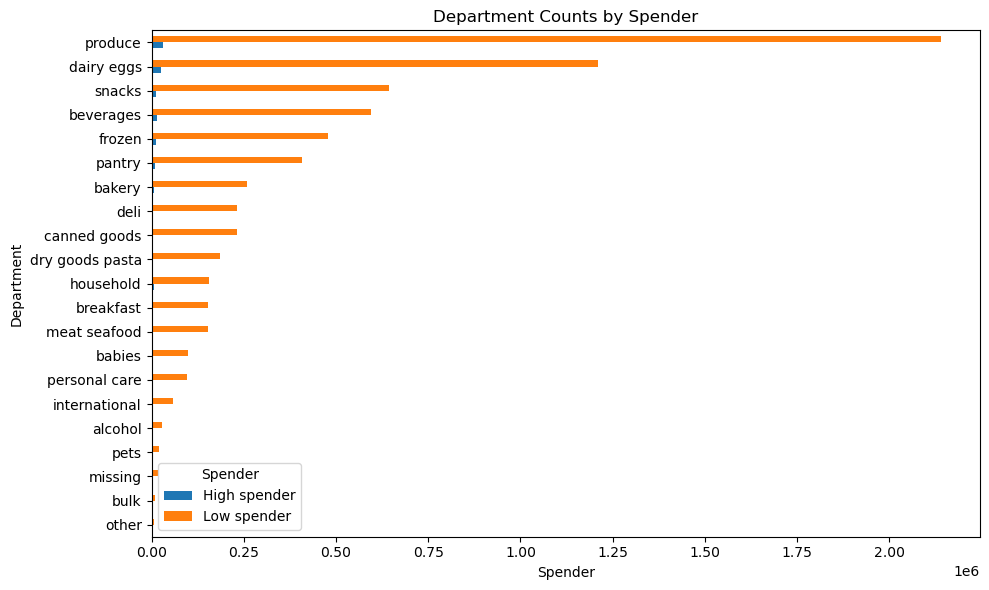

In [39]:
summary = summary.sort_values(by='Low spender', ascending=True)
ax = summary.plot(kind='barh', figsize=(10, 6))
plt.title('Department Counts by Spender')
plt.xlabel('Spender')
plt.ylabel('Department')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Spender')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'dept_by_spender_h.png'))
plt.show()

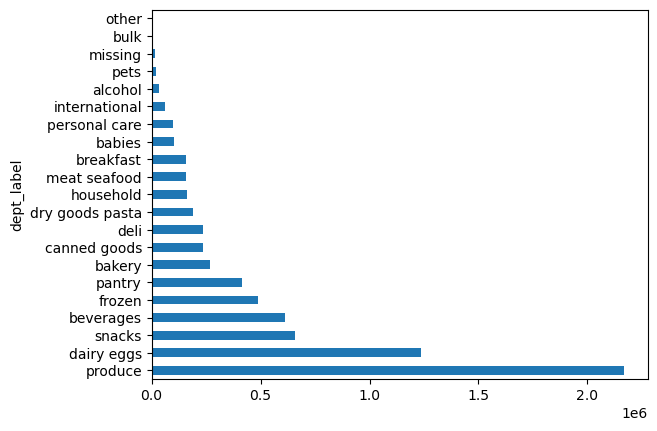

In [27]:
bar = df_1['dept_label'].value_counts().plot.barh()

In [67]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'dept_values_h.png'))

# 3. Create and save pie charts

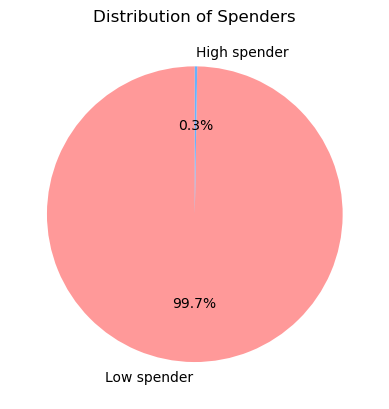

In [9]:
# Make a pie chart showing the distribution of Spenders
spending_counts = new_all_merged['spending_flag'].value_counts()
spender_pie = spending_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Spenders')
plt.show()

In [67]:
spender_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'spender_pie.png'))

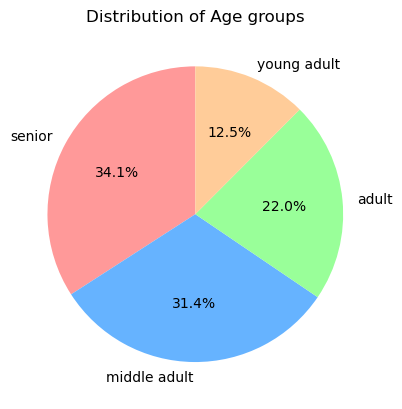

In [65]:
# Make a pie chart showing the distribution of Ages
age_counts = new_all_merged['age_group'].value_counts()
age_pie = age_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age groups')
plt.show()

In [69]:
age_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_pie.png'))

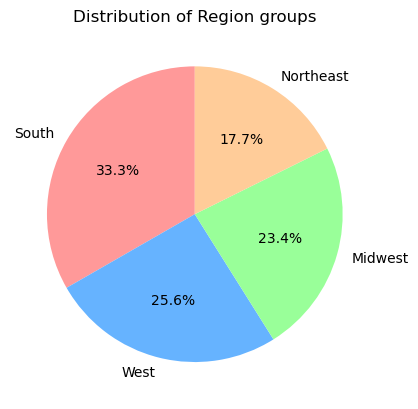

In [113]:
# Make a pie chart showing the distribution of regions
region_counts = new_all_merged['Region'].value_counts()
region_pie = region_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Region groups')
region_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_pie.png'))
plt.show()

# 4. Create and save multiples bar charts

In [71]:
df_2 = small[['orders_day_of_week','Region']]

In [77]:
# create bar chart
group = df_2.groupby('Region')['orders_day_of_week'].value_counts().unstack(fill_value=0)

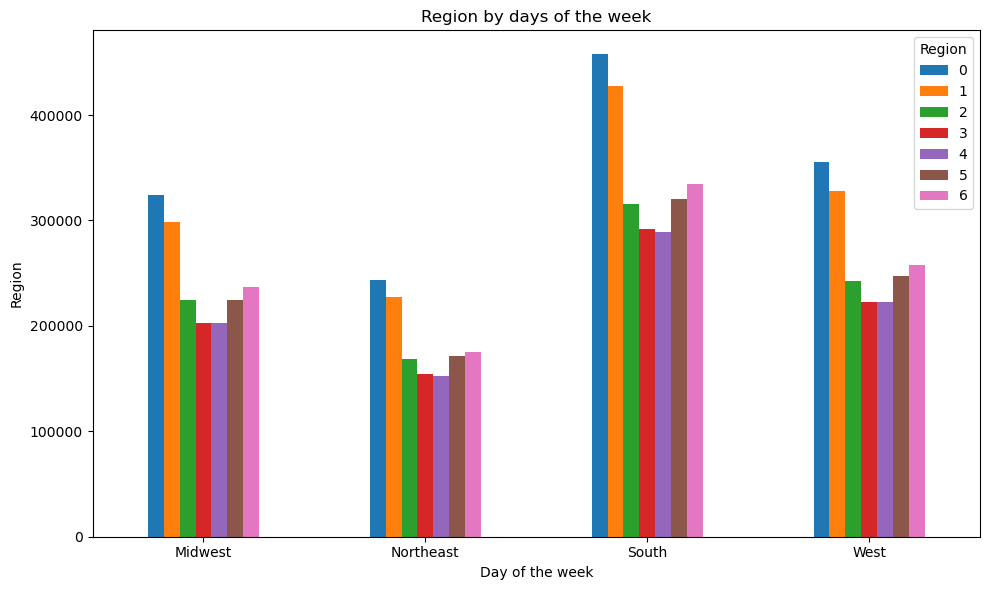

In [79]:
ax = group.plot(kind='bar', figsize=(10, 6))
plt.title('Region by days of the week')
plt.xlabel('Day of the week')
plt.ylabel('Region')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_day_bar.png'))
plt.show()

In [81]:
df_3 = small[['dept_label','Region']]

In [83]:
# create bar chart
depreg = df_3.groupby('Region')['dept_label'].value_counts().unstack(fill_value=0)

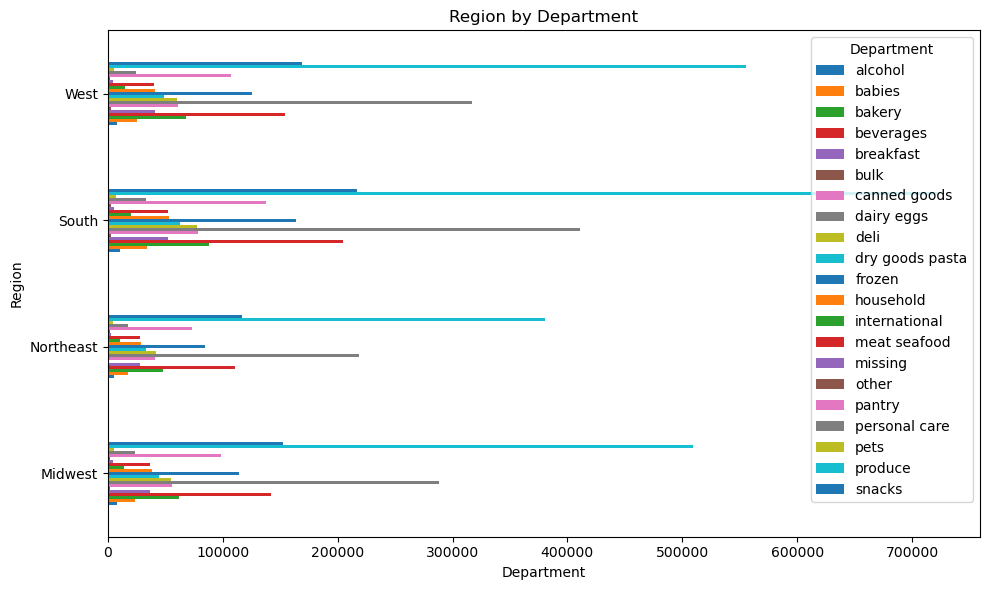

In [93]:
ax = depreg.plot(kind='barh', figsize=(10, 6))
plt.title('Region by Department')
plt.xlabel('Department')
plt.ylabel('Region')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Department')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_dept_bar.png'))
plt.show()

In [97]:
df_4 = small[['age_group','Region','income_group','dependents_flag']]

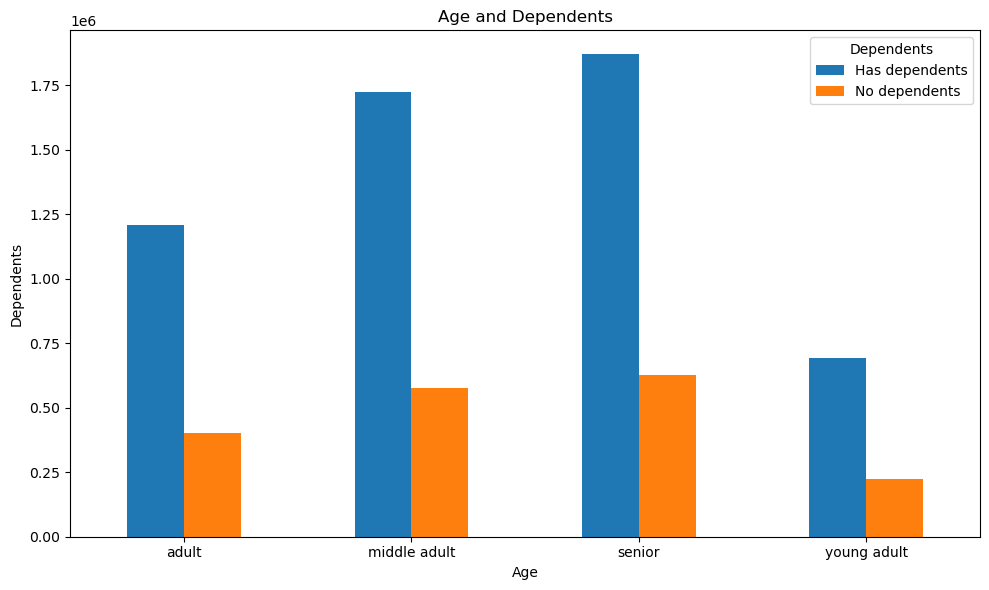

In [105]:
agedeps = df_4.groupby('age_group')['dependents_flag'].value_counts().unstack(fill_value=0)
ax = agedeps.plot(kind='bar', figsize=(10, 6))
plt.title('Age and Dependents')
plt.xlabel('Age')
plt.ylabel('Dependents')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Dependents')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_deps_bar.png'))
plt.show()

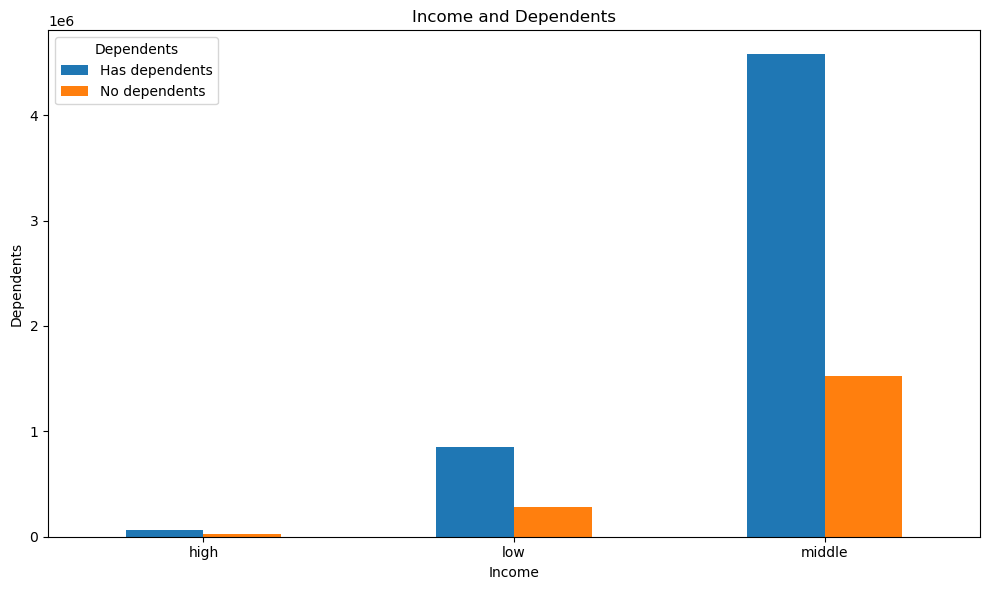

In [107]:
incdeps = df_4.groupby('income_group')['dependents_flag'].value_counts().unstack(fill_value=0)
ax = incdeps.plot(kind='bar', figsize=(10, 6))
plt.title('Income and Dependents')
plt.xlabel('Income')
plt.ylabel('Dependents')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Dependents')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'inc_deps_bar.png'))
plt.show()

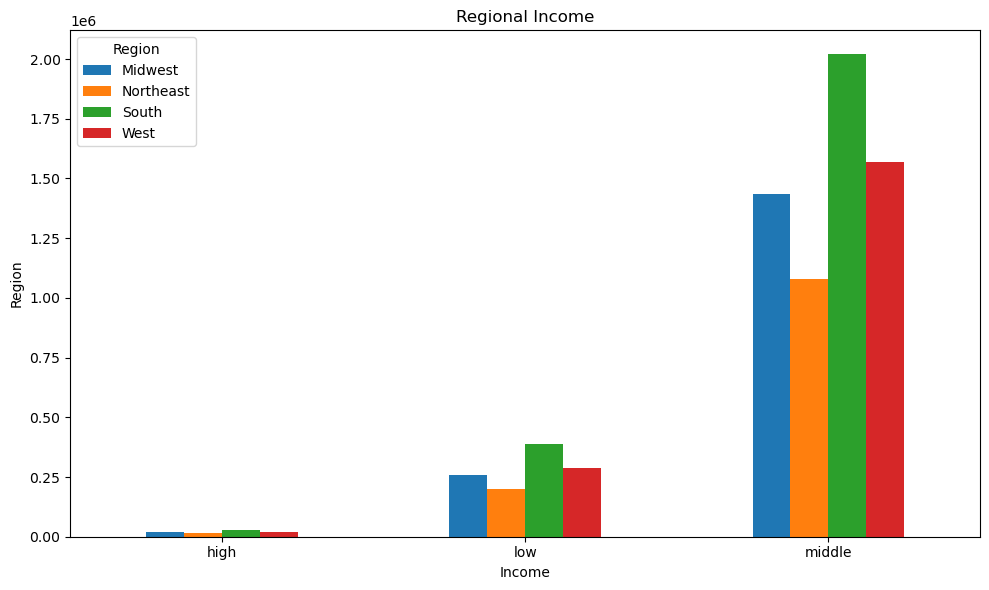

In [109]:
reginc = df_4.groupby('income_group')['Region'].value_counts().unstack(fill_value=0)
ax = reginc.plot(kind='bar', figsize=(10, 6))
plt.title('Regional Income')
plt.xlabel('Income')
plt.ylabel('Region')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'reg_inc_bar.png'))
plt.show()

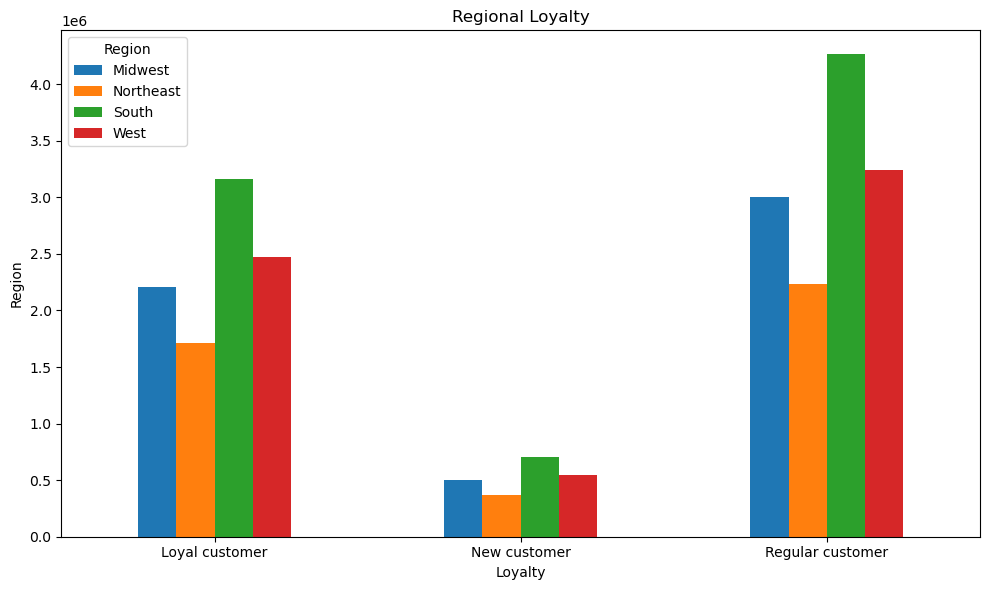

In [111]:
regloyal = new_all_merged.groupby('loyalty_flag')['Region'].value_counts().unstack(fill_value=0)
ax = regloyal.plot(kind='bar', figsize=(10, 6))
plt.title('Regional Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Region')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'reg_loyal_bar.png'))
plt.show()

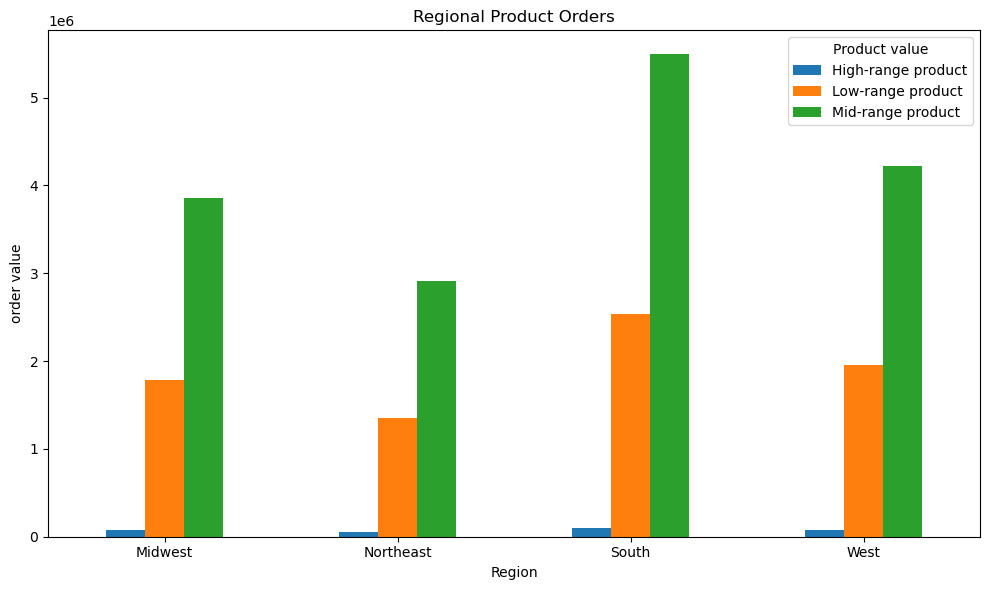

In [11]:
# make a bar chart to show regional order types
regorders = new_all_merged.groupby('Region')['price_range_loc'].value_counts().unstack(fill_value=0)
ax = regorders.plot(kind='bar', figsize=(10, 6))
plt.title('Regional Product Orders')
plt.xlabel('Region')
plt.ylabel('order value')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Product value')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'reg_orders_bar.png'))
plt.show()

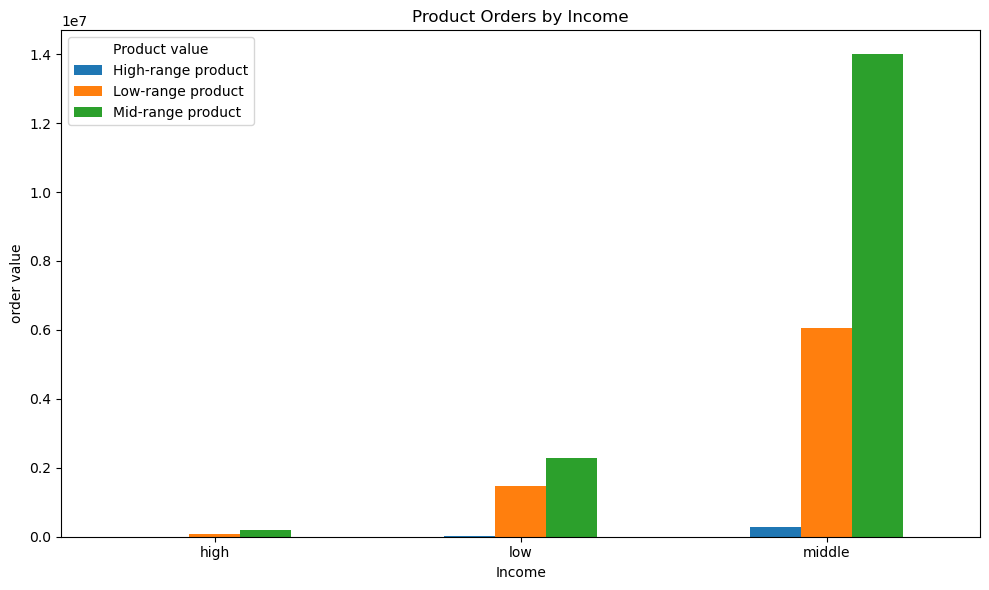

In [117]:
# make a bar chart to show income order types
incorders = new_all_merged.groupby('income_group')['price_range_loc'].value_counts().unstack(fill_value=0)
ax = incorders.plot(kind='bar', figsize=(10, 6))
plt.title('Product Orders by Income')
plt.xlabel('Income')
plt.ylabel('order value')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Product value')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'inc_orders_bar.png'))
plt.show()

# 5. Investigate visualisations for three or more variables

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


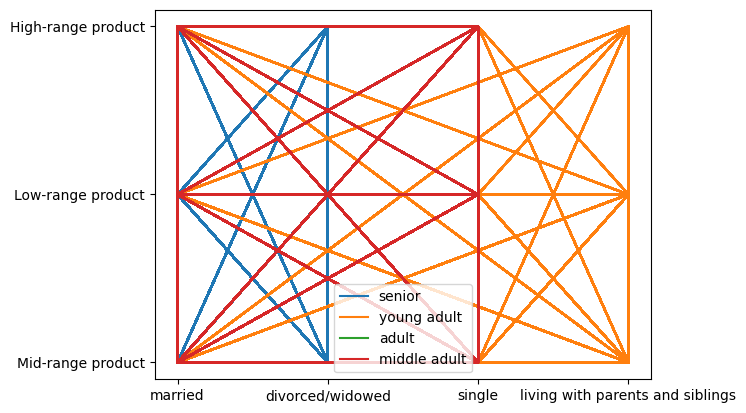

In [123]:
#age, family status and ordering habits (age_group, family_status, price_range_loc)
age_set = set(new_all_merged['age_group'])

plt.figure()
for age_group in age_set:
     selected_data = new_all_merged.loc[new_all_merged['age_group'] == age_group]
     plt.plot(selected_data['fam_status'], selected_data['price_range_loc'], label=age_group)
     
plt.legend()
plt.show()
# need to learn advanced python to understand better

# 6. Look at different variable aggregations

In [9]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
new_all_merged.groupby('fam_status').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                                         mean min max
fam_status                                           
divorced/widowed                    22.119075   5  99
living with parents and siblings    22.102311   5  99
married                             21.886303   5  99
single                              22.088822   5  99

In [11]:
new_all_merged.groupby('fam_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
fam_status                                           
divorced/widowed                  7.802878  1.0  25.0
living with parents and siblings  7.800691  1.0  25.0
married                           7.789876  1.0  25.0
single                            7.784801  1.0  25.0

In [13]:
new_all_merged.groupby('Region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
Region                        
Midwest    7.790719  1.0  25.0
Northeast  7.781979  1.0  25.0
South      7.795570  1.0  25.0
West       7.790263  1.0  25.0

In [15]:
new_all_merged.groupby('Region').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                  mean min max
Region                        
Midwest      21.702417   5  99
Northeast    22.031923   5  99
South        21.965822   5  99
West         22.098505   5  99

In [7]:
new_all_merged.groupby('age_group').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                     mean min max
age_group                        
adult           21.956073   5  99
middle adult    21.947040   5  99
senior          21.933135   5  99
young adult     21.992008   5  99

In [17]:
new_all_merged.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
age_group                        
adult         7.786030  1.0  25.0
middle adult  7.791349  1.0  25.0
senior        7.795128  1.0  25.0
young adult   7.784975  1.0  25.0

In [19]:
new_all_merged.groupby('dependents_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
dependents_flag                     
Has dependents   7.790568  1.0  25.0
No dependents    7.790987  1.0  25.0

In [ ]:
# no behavioural insights except perhaps regional differences (very small) otherwise behaviour same across ages, fam status and region.

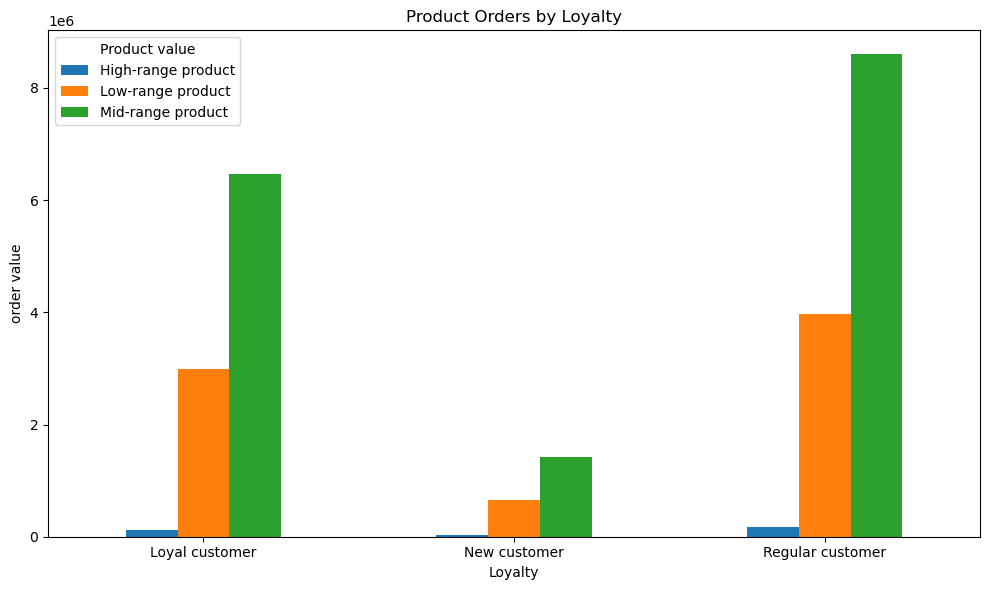

In [5]:
# make a bar chart to show loyalty order types
loyalords = new_all_merged.groupby('loyalty_flag')['price_range_loc'].value_counts().unstack(fill_value=0)
ax = loyalords.plot(kind='bar', figsize=(10, 6))
plt.title('Product Orders by Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('order value')
plt.xticks(rotation=0)  # Rotate x labels for better visibility
plt.legend(title='Product value')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyal_ords_bar.png'))
plt.show()

In [5]:
new_all_merged.groupby('age_group').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                          mean min max
age_group                             
adult                13.354324   0  23
middle adult         13.374955   0  23
senior               13.366549   0  23
young adult          13.334059   0  23

In [7]:
new_all_merged.groupby('age_group').agg({'order_hour_of_day': ['median', 'min', 'max']})

order_hour_of_day        
                        median min max
age_group                             
adult                     13.0   0  23
middle adult              13.0   0  23
senior                    13.0   0  23
young adult               13.0   0  23

In [11]:
new_all_merged.groupby('age_group').agg({'orders_day_of_week': ['median', 'min', 'max']}) 

orders_day_of_week        
                         median min max
age_group                              
adult                       3.0   0   6
middle adult                3.0   0   6
senior                      3.0   0   6
young adult                 3.0   0   6